## step1: load the images

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def random_image(test_train,yes_no):
  if test_train=='train' and yes_no=='yes':
    path = '/content/drive/MyDrive/brain_tumor_train/train/yes'
    files = os.listdir(path)
    randomFile = random.choice(files)
    print(randomFile)
    image = Image.open(path + '/' + randomFile)  # displayed the image
    plt.imshow(image)
  elif test_train=='train' and yes_no=='no':
    path = '/content/drive/MyDrive/brain_tumor_train/train/no'
    files = os.listdir(path)
    randomFile = random.choice(files)
    print(randomFile)
    image = Image.open(path + '/' + randomFile)  # displayed the image
    plt.imshow(image)
  elif test_train=='test' and yes_no=='yes':
    path = '/content/drive/MyDrive/brain_tumor_train/test/yes'
    files = os.listdir(path)
    randomFile = random.choice(files)
    print(randomFile)
    image = Image.open(path + '/' + randomFile)  # displayed the image
    plt.imshow(image)
  elif test_train=='test' and yes_no=='no':
    path = '/content/drive/MyDrive/brain_tumor_train/test/no'
    files = os.listdir(path)
    randomFile = random.choice(files)
    print(randomFile)
    image = Image.open(path + '/' + randomFile)  # displayed the image
    plt.imshow(image)
  else:
    print("no such file or directory")

Y75.JPG


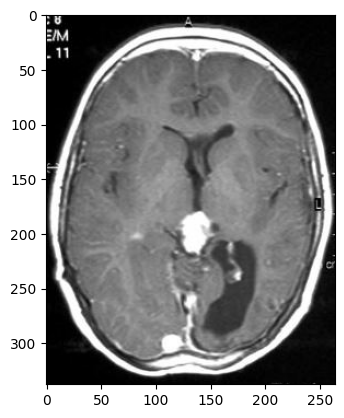

In [3]:
random_image('train','yes')

4 no.jpg


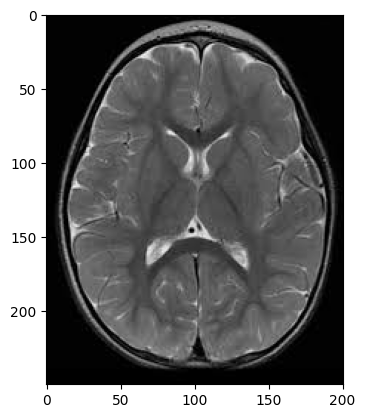

In [4]:
random_image('test','no')

Y148.JPG
no 92.jpg
Y4.jpg
5 no.jpg


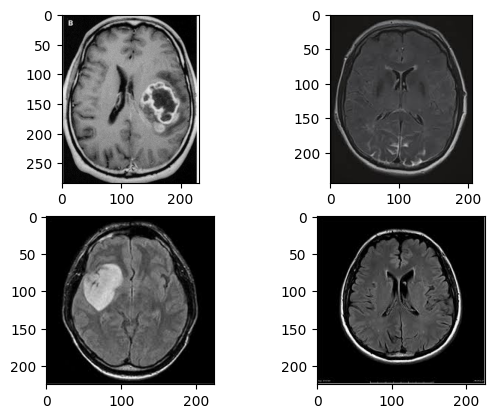

In [5]:
#visualize random images side by side
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(2,2,1)
random_image('train','yes')
plt.subplot(2,2,2)
random_image('train','no')
plt.subplot(2,2,3)
random_image('test','yes')
plt.subplot(2,2,4)
random_image('test','no')

## step2: preprocess the images

In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#normalization of data values to 0 and 1
train_datagen=ImageDataGenerator(rescale=1./255) #divide all the pixel values by 255
valid_datagen=ImageDataGenerator(rescale=1./255) #divide all the pixel values by 255

#setup paths to directories
train_dir="/content/drive/MyDrive/brain_tumor_train/train"
test_dir="/content/drive/MyDrive/brain_tumor_train/test"

#import data from directories
train_data=train_datagen.flow_from_directory(directory=train_dir, #target directory
                                             batch_size=32, #convert the sample to batches
                                             target_size=(32,32), #target size of the images
                                             class_mode="binary", #binary since the classes are yes or no
                                             seed=42) #for randomization
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(32,32),
                                             class_mode="binary",
                                             seed=42)

#building the CNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_2=tf.keras.models.Sequential()

model_2.add(Conv2D(filters=6,
                   kernel_size=5,
                   activation="tanh",
                   input_shape=(32,32,3)))#c1
model_2.add(MaxPooling2D(pool_size=2
                         ,padding="valid"))#s2
model_2.add(Conv2D(filters=16,
                   kernel_size=5,
                   activation="tanh"))#c3
model_2.add(MaxPooling2D(pool_size=2
                         ,padding="valid"))#s4
model_2.add(Conv2D(filters=120,
                   kernel_size=5,
                   activation="tanh"))#c5
model_2.add(Flatten())
model_2.add(Dense(120,activation="tanh"))#f6

model_2.add(Dense(1,activation="sigmoid"))#output binary classification


Found 233 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


## step3: compiling the model

In [34]:
model_2.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

## step4: compile the model

In [35]:
history_2=model_2.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=valid_data,
                     validation_steps=len(valid_data))

Epoch 1/5
8/8 [==============================] - 3s 207ms/step - loss: 0.6153 - accuracy: 0.6223 - val_loss: 0.6837 - val_accuracy: 0.5000
Epoch 2/5
8/8 [==============================] - 1s 168ms/step - loss: 0.5130 - accuracy: 0.7511 - val_loss: 0.5277 - val_accuracy: 0.7000
Epoch 3/5
8/8 [==============================] - 1s 166ms/step - loss: 0.5010 - accuracy: 0.7811 - val_loss: 0.5410 - val_accuracy: 0.7500
Epoch 4/5
8/8 [==============================] - 1s 151ms/step - loss: 0.4334 - accuracy: 0.8155 - val_loss: 0.5188 - val_accuracy: 0.6000
Epoch 5/5
8/8 [==============================] - 1s 146ms/step - loss: 0.4104 - accuracy: 0.8069 - val_loss: 0.5125 - val_accuracy: 0.8000


In [37]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 14, 14, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 5, 5, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 120)              

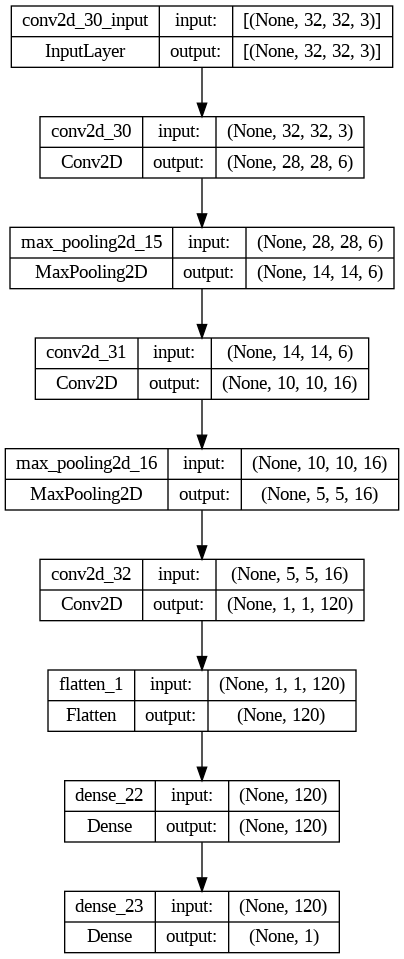

In [38]:
from tensorflow.keras.utils import plot_model
plot_model(model_2, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)